In [1]:
import time
now = time.time()

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dataset = pd.read_csv('DataSets/DatasetsCreated/train_dataset.csv')
train_dataset.shape

(1015389, 93)

In [4]:
test_dataset = pd.read_csv('DataSets/DatasetsCreated/test_dataset.csv')
test_dataset.shape

(113640, 90)

In [5]:
test_dataset = test_dataset.replace([np.inf, -np.inf], 0)
test_dataset.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Count,DateTrack,DayNum,Discount,...,UserRedeemRecent,MerchantBuysRecent,MerchantReleasesRecent,MerchantRedeemRecent,CouponReleasesRecent,CouponRedeemRecent,MerchantUserReleasesRecent,MerchantUserRedeemRecent,NewMerchantOldUser,OldMerchantNewUser
0,4129537,450,9983.0,"[30, 5, 0.833]",1,2016-07-12,NaN,2016-07-12,194,30:5,...,0,3,0,3,0,0,0,0,1,0
1,6949378,1300,3429.0,"[30, 5, 0.833]",2,2016-07-06,NaN,2016-07-06,188,30:5,...,0,6,0,0,0,0,1,0,0,0
2,2166529,7113,6928.0,"[200, 20, 0.9]",5,2016-07-27,NaN,2016-07-27,209,200:20,...,0,0,0,0,0,0,1,0,0,0
3,2166529,7113,1808.0,"[100, 10, 0.9]",5,2016-07-27,NaN,2016-07-27,209,100:10,...,0,0,0,0,0,0,1,0,0,0
4,6172162,7605,6500.0,"[30, 1, 0.967]",2,2016-07-08,NaN,2016-07-08,190,30:1,...,0,7,0,2,0,1,1,0,0,0


## Categorical Data

In [6]:
# categorical_features = ['Tag', 'Purchaser', 'Merchant_Popular']
# for feature in categorical_features:
#     train_dataset[feature] = pd.Categorical(train_dataset[feature])

# One Hot Encoding
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['Tag'], prefix='Tag',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['DayOfWeek'], prefix='DayOfWeek',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)


## Final Features

In [7]:
remove_columns = ['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate','Discount','Date_received',
                  'Date','Count','RedemptionDuration','DayList','DateTrack','DayNum','First_day',
                  'MerchantBuyList', 'Merchant_User_Visit', 'MerchantRedeemList','MerchantReleaseList',
                  'User_Coupon_Redeemed', 'User_Coupon_Ratio','User_discount_Ratio','Discounted_Redeemed',
                  'Coupon_User_Visit','UserReleaseList','UserRedeemList','CouponRedeemList','CouponReleaseList',
                 'MerchantUserReleaseList','MerchantUserRedeemList','FirstReleaseDate','UsersRecentMerchants',
                  'User_Merchant_Ratio', 'Visits', 'Duration', 'Merchant_AvgRate','Merchant_AvgDistance'
                 ,'UniqueUsersCount','AvgDailyUsers']
unimportant_features = ['DayOfWeek','ImpDay','Merchant_Popular','Purchaser']
non_time_based = ['User_Redeemed_Buy','User_Buys','User_Redeemed','User_Released','User_Ratio',
                 'Merchant_Ratio','Merchant_Redeemed','Merchant_Buys', 'Merchant_Redeemed_Buy',
                 'Coupon_Redeemed','Coupon_Released','Coupon_Ratio']
features = list(set(train_dataset.columns)-set(remove_columns)-set(['Target'])-set(unimportant_features)-set(non_time_based))
print('Features to be included:'+str(len(features)))                  
print(features)

Features to be included:47
['UserRedeemedBuyRatioTime', 'UniqueReleasesCount', 'MerchantRedeemedBuyRatioTime', 'OldMerchantNewUser', 'Tag', 'Rate', 'UserBuysRecent', 'LastMerchantRedemption', 'UserMerchantCount', 'NewMerchantOldUser', 'ReleasesCount', 'LastUserVisit', 'MerchantRatioTime', 'MerchantRedeemTime', 'FirstTimeCouponUser', 'Distance', 'FirstTimeMerchantUser', 'LastMerchantVisit', 'MerchantUserReleasesRecent', 'MerchantReleasesTime', 'FirstTimeMerchant', 'UserRedeemRecent', 'UserReleasesRecent', 'MerchantReleasesRecent', 'LastMerchantUserVisit', 'MerchantUserRedeemTime', 'UserReleasesTime', 'MerchantRedeemRecent', 'MerchantUserRatioTime', 'CouponReleasesRecent', 'FirstTimeUser', 'LastCouponUserVisit', 'Original_price', 'CouponDurationTime', 'UserRedeemTime', 'UserBuysTime', 'Weekend', 'MerchantUserReleasesTime', 'CouponRedeemTime', 'CouponRatioTime', 'MerchantBuysTime', 'MerchantUserRedeemRecent', 'MerchantBuysRecent', 'UserRatioTime', 'Discounted_price', 'CouponRedeemRecent',

## Positive and Negative classes distribution

0    953236
1     62153
Name: Target, dtype: int64


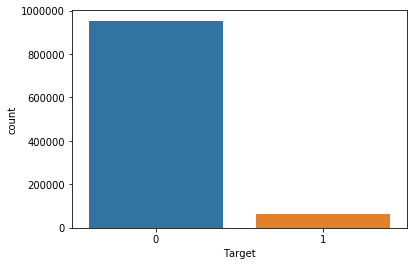

In [8]:
ax = sns.countplot(x='Target', data=train_dataset)
print(train_dataset['Target'].value_counts())

In [9]:
train_dataset.shape

(1015389, 93)

# Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE

In [11]:
def save_model(model):
    #saving model
    from sklearn.externals import joblib 

    # Save the model as a pickle in a file 
    joblib.dump(model, 'Model/xgboost.pkl') 

    # Load the model from the file 
    clf_saved= joblib.load('Model/xgboost.pkl')  


In [12]:
y = list(train_dataset['Target'])
X = train_dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.175)

In [13]:
# X_train = train_dataset[train_dataset['DayNum']<=120]
# y_train = X_train['Target']

# X_val = train_dataset[(train_dataset['DayNum']>120)&(train_dataset['DayNum']<=150)]
# y_val = X_val['Target']

# X_test = train_dataset[train_dataset['DayNum']>150]
# y_test = X_test['Target']

### XGBoost

In [14]:
# params = {
#         'min_child_weight': [5],                       #[1,2,3,4,5],
#         'gamma': [1],                                  #[0,0.5, 1, 1.5, 2, 5],
#         'subsample': [0.8],                              #[0.6, 0.8,1.0],
#         'colsample_bytree': [0.8],                       #[0.6, 0.8,1.0],
#         'max_depth': [5],                                #[3,4,5],
#         'learning_rate': [0.1],                          #[0.01,0.05,0.1,0.5],
#         'scale_pos_weight': [1],                         #[1],                 
#         'alpha': [0.2]                                   #[0.1,0.2,0.3,0.4,0.5]
#         }

clf = XGBClassifier(
     n_estimators=500,
     objective= 'binary:logistic',
     nthread=3,
     scale_pos_weight=1,
     seed=410,
     alpha=0.2,
     colsample_bytree=0.8,
     gamma=1,
     learning_rate=0.1,
     max_depth=5,
     min_child_weight=5,
     subsample=0.8)


## Method 1: Class Weight (Balancing)

In [15]:
# weights = np.linspace(0.05, 0.95, 5)
# gsc = GridSearchCV(
#     estimator=clf,
#     param_grid={
#         'class_weight': [{0: x, 1: 1.0-x} for x in weights]
#     },
#     scoring='f1',
#     cv=5
# )
# grid_result = gsc.fit(X_train[features][:1000], y_train[:1000])
# print("Best parameters : %s" % grid_result.best_params_)


## Method 2: SMOTE 

In [16]:
# weights = np.linspace(0.005, 0.25, 5)

# gsc = GridSearchCV(
#     estimator=clf,
#     param_grid={
#         'smote__ratio': weights
#     },
#     scoring='f1',
#     cv=3
# )
# grid_result = gsc.fit(X_train[features][:100000], y_train[:100000])

# print("Best parameters : %s" % grid_result.best_params_)

In [17]:
def train_model():

    clf = XGBClassifier(
     n_estimators=500,
     objective= 'binary:logistic',
     nthread=3,
     scale_pos_weight=1,
     seed=410,
     alpha=0.2,
     colsample_bytree=0.8,
     gamma=1,
     learning_rate=0.1,
     max_depth=5,
     min_child_weight=5,
     subsample=0.8,
    smote__ratio=0.005,
    class_weight={0: 0.05, 1: 0.95})
    
    model = clf.fit(X_train[features], y_train)
#     save_model(model)
    
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(15, 9)
    plt.show()

    return model


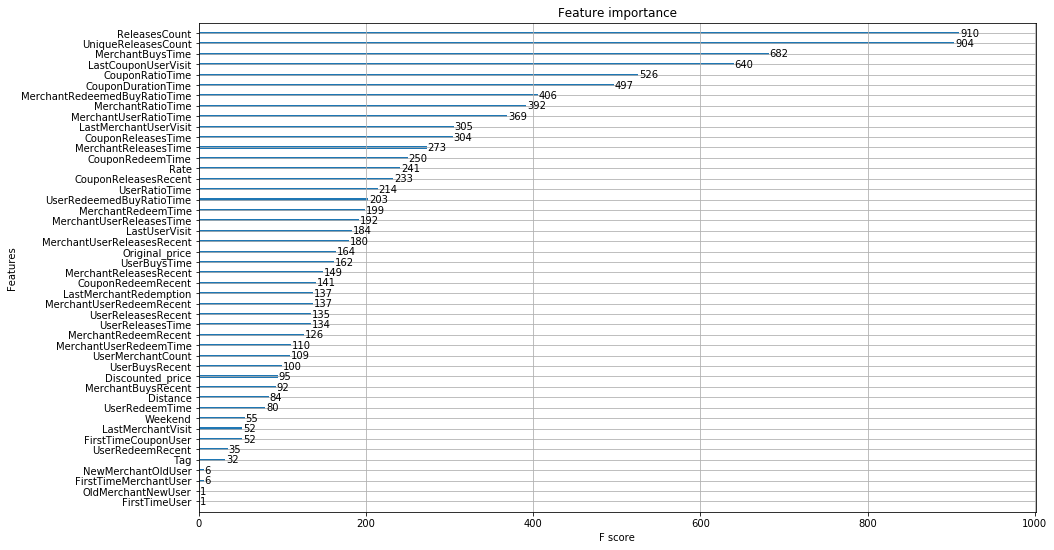

In [18]:
model = train_model()

In [19]:
# feature_importances = pd.DataFrame(model.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=True)
# feature_importances.plot(kind='barh',figsize=(10,20))

In [20]:
def evaluate_model(X_check, y_check):
    
    
    predictions = (model.predict_proba(X_check[features])[:,1]).tolist()
    predicted_values = (model.predict(X_check[features])).tolist()
    dataset = X_check.copy()
    dataset['Probability'] = [round(i, 6) for i in predictions]
    output = dataset[['User_id','Merchant_id','Date_received','Probability']]
    
    

    roc_score = round(roc_auc_score(y_check, predictions), 3)

    print('ROC AUC Score of Probailities:  '+ str(roc_score))
    print('ROC AUC Curve')
    fpr, tpr, _ = metrics.roc_curve(y_check, predictions)
    auc = metrics.roc_auc_score(y_check, predictions)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    
    predicted_values = [1 if x>0.5 else 0 for x in predictions]
    #print('AUC score of Predicted Values')
    #print(round(roc_auc_score(y_check, predicted_values), 3))
    print('______________________________________________________________________')
    print('\n The classification report for the model:')
    print(classification_report(y_check, predicted_values) )
    
    results = confusion_matrix(y_check, predicted_values) 
    print('______________________________________________________________________')
    print('\n The confusion matrix for the model:')
    print(results)
    print('______________________________________________________________________')
    
#     threshold = np.arange(0,1,0.001)
#     precision = np.zeros(len(threshold))
#     recall = np.zeros(len(threshold))
#     for i in range(len(threshold)):
#         y1 = np.zeros(len(y_check),dtype=int)
#         y1 = np.where(predictions<=threshold[i],0,1)
#         precision[i] = precision_score(y_check,y1)
#         recall[i] = recall_score(y_check,y1)

#     plt.figure(figsize=(12,9))
#     sns.set_style('whitegrid')
#     sns.lineplot(x=threshold,y=precision)
#     sns.lineplot(x=threshold,y=recall)
#     plt.xlabel('Threshold')
#     plt.title('Recall and Precision Values Vs Threshhold values')
#     plt.show()
    
    return output, dataset
    

## Validation Data Scores

ROC AUC Score of Probailities:  0.999
ROC AUC Curve


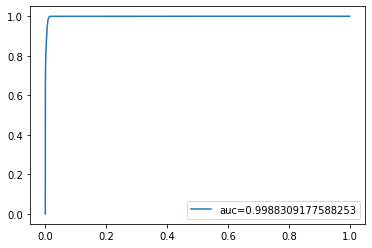

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    141750
           1       0.90      0.95      0.93      9289

    accuracy                           0.99    151039
   macro avg       0.95      0.97      0.96    151039
weighted avg       0.99      0.99      0.99    151039

______________________________________________________________________

 The confusion matrix for the model:
[[140787    963]
 [   426   8863]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
761963,5532106,6485,2016-05-21,0.000001
24283,176574,3381,2016-04-10,0.000006
557513,4056576,1169,2016-01-29,0.000005
369902,2692446,6454,2016-02-07,0.000006
107922,786334,3939,2016-05-31,0.000000


In [21]:
val_output, val_data = evaluate_model(X_val, y_val)
val_output.head()

## Test Data Scores

ROC AUC Score of Probailities:  0.999
ROC AUC Curve


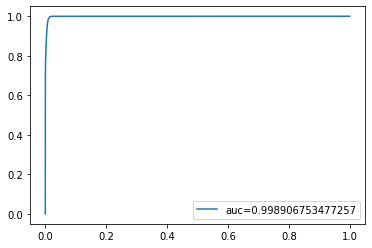

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    142942
           1       0.90      0.96      0.93      9367

    accuracy                           0.99    152309
   macro avg       0.95      0.98      0.96    152309
weighted avg       0.99      0.99      0.99    152309

______________________________________________________________________

 The confusion matrix for the model:
[[141976    966]
 [   404   8963]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
715091,5193451,7555,2016-04-16,0.000003
936313,6788567,3527,2016-03-22,0.000001
935861,6785479,450,2016-02-02,0.000001
73628,536792,1375,2016-05-13,0.000002
810548,5882244,4860,2016-02-07,0.000002


In [22]:
test_output, test_data = evaluate_model(X_test, y_test)
test_output.head()

In [27]:
def training2(train_dataset):
    y = y_train
    X = X_train[features]
    data_dmatrix = xgb.DMatrix(data=X, label=y)
    params =  {'objective':'binary:logistic','colsample_bytree':0.8,'learning_rate':0.1,
                'max_depth':5,'n_estimators':500,'scale_pos_weight':1,'colsample_bytree':0.8,
               'min_child_weight':5,' subsample':0.8, 'alpha':0.2, 'gamma':1}
    

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,
                        early_stopping_rounds=10, as_pandas=True, seed=410,  metrics='auc') 
    return cv_results
    
training2(train_dataset)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.996719,0.000034,0.996680,0.000126
1,0.996850,0.000090,0.996831,0.000098
2,0.997119,0.000293,0.997092,0.000272
3,0.997305,0.000060,0.997281,0.000082
4,0.997352,0.000053,0.997318,0.000087
5,0.997380,0.000040,0.997342,0.000095
6,0.997408,0.000058,0.997372,0.000133
7,0.997454,0.000036,0.997410,0.000121
8,0.997483,0.000028,0.997439,0.000120
9,0.997484,0.000025,0.997437,0.000129


# Test Dataset and Submission File

In [24]:
predictions = (model.predict_proba(test_dataset[features])[:,1]).tolist()
predicted_values = (model.predict(test_dataset[features])).tolist()
test = pd.merge(test_dataset[features], test_dataset[['User_id','Merchant_id','Date_received']]
                , how='left',left_index=True,right_index=True)
test['Probability'] = [round(i, 6) for i in predictions]
output = test[['User_id','Merchant_id','Date_received','Probability']]

output[output['Probability']>0.5]

,User_id,Merchant_id,Date_received,Probability
512,6879802,7221,2016-07-07,0.983517
685,2855209,3251,2016-07-17,0.659511
926,3678007,2339,2016-07-23,0.534713
1302,4597402,5831,2016-07-05,0.638347
2211,3087229,6189,2016-07-23,0.997458
...,...,...,...,...
111822,6977597,5010,2016-07-27,0.903079
111826,6977597,5010,2016-07-07,0.591723
112736,5897501,3847,2016-07-04,0.799314
112876,7309637,7354,2016-07-18,0.735689


In [25]:
output.to_csv('OutputFile.csv',index=False) 


# Execution Time of this notebook

In [26]:
later = time.time()
difference = later - now
print('Time taken for the execution of this notebook: '+str(round(difference/60,2))+' mins')

Time taken for the execution of this notebook: 11.63 mins
